In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
dfi = pd.read_csv("fct_invoice.csv")
dfc = pd.read_json("dim_customer.json")
#pd.set_option("display.max_rows",None)
pd.set_option("display.float_format",lambda x: "%.2f" % x)

In [3]:
dfi
dfc=dfc.rename(columns={"id":"customer_id"})

EASY
 1. How many unique customers are in the dataset?

In [4]:
dfi.nunique()["customer_id"]

5191

2. What are the different categories of products available? How many unique categories are there?

In [5]:
for i in dfi.drop_duplicates("category")["category"]:
    print(i)
dfi.nunique()["category"]

Clothing
Shoes
Books
Cosmetics
Food & Beverage
Toys
Technology
Souvenir


8

3. Which payment method is the most popular? How many times was it used?

In [6]:
payment = dfi["payment_method"].value_counts().idxmax()
used = dfi["payment_method"].value_counts().max()
print(payment, used)

Cash 44447


Medium
1. What are the three most popular categories, by total sales?

In [7]:
dfi["total_sales"] = dfi["quantity"]*dfi["price"]
dfi.groupby("category")["total_sales"].sum().sort_values(ascending=0).head(3).index.tolist()


['Clothing', 'Shoes', 'Technology']

2. What are the total sales attributed to customers over the age of 45?

In [8]:
merged = pd.merge(dfi,dfc,on="customer_id",how="inner")
merged = merged.fillna(0)
merged[merged["age"]>45]["total_sales"].sum()

82039768.15

3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

<Axes: xlabel='invoice_date', ylabel='quantity'>

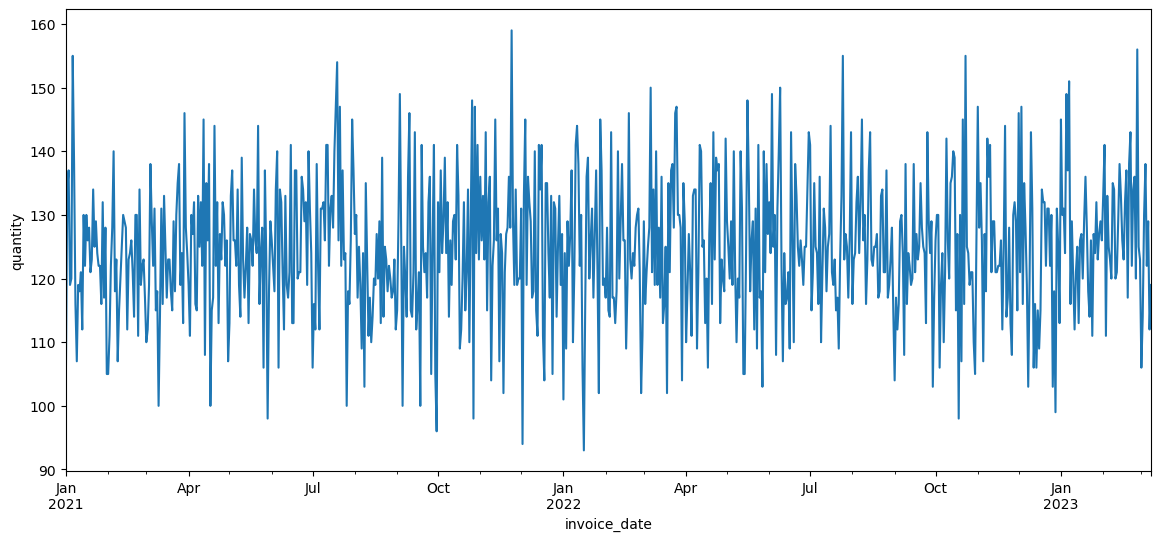

In [37]:
merged['invoice_date'] = pd.to_datetime(merged['invoice_date'],format='%d/%m/%Y')
cnt = merged.groupby(merged['invoice_date']).size()
plt.figure(figsize=(14,6))
plt.ylabel("quantity")
cnt.plot()

Hard
1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).



In [55]:
merged["age_group"] = (merged["age"]//10)*10
merged["age_group"] = ((merged["age"]//10)*10).astype(int).astype(str)+ "-"+((merged["age"]//10)*10+9).astype(int).astype(str)
pd.set_option("display.max_rows",None)
pivot = pd.pivot_table(merged,index=["category", "age_group"],values="total_sales", aggfunc="sum").reset_index()
pivot


,category,age_group,total_sales
0,Books,0-9,334012.05
1,Books,10-19,12801.75
2,Books,20-29,79461.75
3,Books,30-39,84143.10
4,Books,40-49,87203.40
5,Books,50-59,74962.20
6,Books,60-69,80476.80
7,Books,70-79,54827.85
8,Books,80-89,26664.00
9,Clothing,0-9,46003764.40
